In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tiffConverter import convert_to_numpy, convert_to_tiff

float32
float32


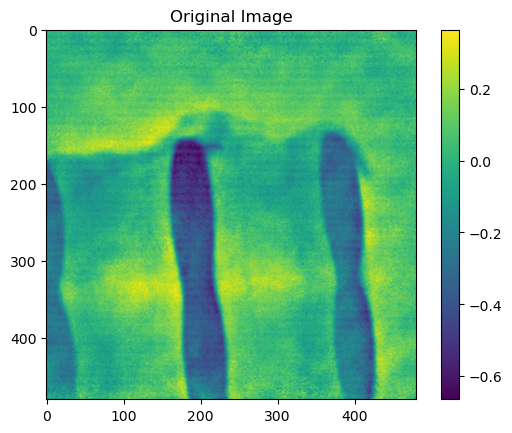

In [37]:
#Read in single image to perform correlation on

# # Low Contrast Projection (Low Contrast target)
# pixelSize = 23.2910 #nanometers (for projections)
# aligned_proj_location = "alignedProjections/aligned_baseCase_Filter_XCtip_20241004-100555.tif"
# kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
# print(kevinProjections[0].shape)
# kevinProj1 = kevinProjections[0,50:550,200:700]
# print(kevinProj1.shape)

# # High Contrast target
# pixelSize = 25430/3276 #7.7625152625152625 nanometers (for high contrast target)
# # aligned_proj_location = "/sdf/home/l/levih/xppl026722/results/shared/xppl1026722_Run0135/KMPIE_2024_12_19-12_05_10-0/final_image/final_image_KMPIE_2024_12_19-12_05_10-0_arg_M000@1.tiff"
# aligned_proj_location = "data/final_image_KMPIE_2024_12_19-12_05_10-0_arg_M000@1.tiff"
# kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
# kevinProj1 = kevinProjections[0]

# # Crop central square half of the image
# y, x = kevinProj1.shape
# crop_size = min(y, x) // 2
# y_center, x_center = y // 2, x // 2
# y_start, y_end = y_center - crop_size // 2, y_center + crop_size // 2
# x_start, x_end = x_center - crop_size // 2, x_center + crop_size // 2
# kevinProj1 = kevinProj1[y_start:y_end, x_start:x_end]

pixelSize = 23.2910 #nanometers (for projections)
n1Location = "FRC Scan Split Test/477_0_final_image_KMPIE_2025_02_04-23_07_45-0_arg_M000@1.tiff"
n2Location = "FRC Scan Split Test/477_1_final_image_KMPIE_2025_02_04-23_08_38-0_arg_M000@1.tiff"
n1 = convert_to_numpy(n1Location)[0][0]
n2 = convert_to_numpy(n2Location)[0][0]

# Crop central square half of the image
y, x = n1.shape
crop_size = round(min(y, x) / 1.5)
y_center, x_center = y // 2, x // 2
y_start, y_end = y_center - crop_size // 2, y_center + crop_size // 2
x_start, x_end = x_center - crop_size // 2, x_center + crop_size // 2
n1 = n1[y_start:y_end, x_start:x_end]
n2 = n2[y_start:y_end, x_start:x_end]

# plt.imshow(kevinProj1)
plt.imshow(n1)
plt.title("Original Image")
plt.colorbar()
plt.show()

In [38]:
# # #Scale image
# # n, shift_value = scaleImage(kevinProj1) # Total photon counts for multiple pixels
# # print(n.shape)

# # # Split photon counts into n1 and n2
# # n1 = np.random.binomial(n, 0.5)  # create n1 from a binomial distribution
# # n2 = n - n1  # Remainder of pixel value assigned to n2

# # n = unscaleImage(n, shift_value)
# # n1 = unscaleImage(n1, shift_value)
# # n2 = unscaleImage(n2, shift_value)



# n = kevinProj1
# probabilities = np.random.binomial(100*np.ones_like(n).astype(int), 0.5)/100
# print(probabilities)

# # Check that the probabilities follow a binomial distribution
# flattened_image = probabilities.flatten()
# plt.hist(flattened_image, bins=101, range=(0, 1), color='blue', alpha=0.7)
# plt.title("Histogram of Pixel Values")
# plt.xlabel("Pixel Value")
# plt.ylabel("Frequency")
# plt.show()


# plt.imshow(probabilities)
# # n = n + np.pi
# n1 = n * probabilities
# n2 = n - n1

# # n1 = np.random.poisson((n1+np.pi)*100)/100 - np.pi
# # n2 = np.random.poisson((n2+np.pi)*100)/100 - np.pi
# plt.colorbar()
# plt.show()


# plt.imshow(n)
# plt.title("Cropped Image")
# plt.colorbar()
# plt.show()
# plt.imshow(n1)
# plt.colorbar()
# plt.title("Split Image 1")
# plt.show()
# plt.imshow(n2)
# plt.colorbar()
# plt.title("Split Image 2")
# plt.show()



In [39]:
# convert_to_tiff(n2, "data/n2Image_highContrast.tif")
# convert_to_tiff(n1, "data/n1Image_highContrast.tif")

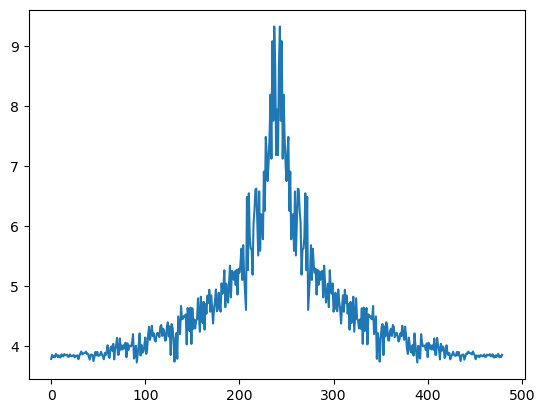

In [40]:
from numpy import fft

I1 = fft.fftshift(fft.fft2(n1))
I2 = fft.fftshift(fft.fft2(n2))
plt.plot(np.log(I1[I1.shape[0]//2]))
plt.show()
# convert_to_tiff(I2, "data/I2Fourier_highContrast.tif")
# convert_to_tiff(I1, "data/I1Fourier_highContrast.tif")
# plt.imshow(np.real(I1))
# plt.colorbar()
# plt.show()
# plt.imshow(np.real(I2))
# plt.show()

In [41]:
def radialSum(x):
    ''' modification of code by sajid an
    Based on the MATLAB code by Michael Wojcik
    '''
    shape = np.shape(x)     
    dim = np.size(shape)
    ''' Depending on the dimension of the image 2D/3D, create an array of integers 
    which increase with distance from the center of the array
    '''
    nr,nc = shape
    nrdc = np.floor(nr/2)
    ncdc = np.floor(nc/2)
    r = np.arange(nr)-nrdc 
    c = np.arange(nc)-ncdc  
    [R,C] = np.meshgrid(r,c)
    index =  np.round(np.sqrt(R**2+C**2)).astype(int)
    # indexf = np.floor(np.sqrt(R**2+C**2))
    # indexC = np.ceil(np.sqrt(R**2+C**2))

    maxindex = min(nr,nc)/2
    output = np.zeros(int(maxindex),dtype = complex)

    
    ''' In the next step output is generated. The output is an array of length
    maxindex. The elements in this array corresponds to the sum of all the elements
    in the original array correponding to the integer position of the output array 
    '''

    # indicesf, indicesC = [], []
    # for i in np.arange(int(maxindex)):
    #     # indices.append(np.where(index == i+1))
    #     indicesf.append(np.where(indexf == i))
    #     indicesC.append(np.where(indexC == i))

    # for i in np.arange(int(maxindex)):
    #     # output[i] = sum(x[indices[i]])/len(indices[i][0])
    #     output[i] = (sum(x[indicesf[i]])+sum(x[indicesC[i]]))/2

    indices = []
    for i in np.arange(int(maxindex)):
        indices.append(np.where(index == i))
    for i in np.arange(int(maxindex)):
        output[i] = sum(x[indices[i]])
    
    return output

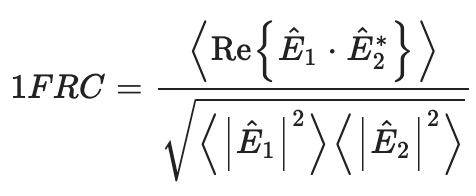

In [42]:
from numpy import fft
def FRC( i1, i2, thresholding='half-bit', single_image=True):

    ''' Performing the fourier transform of input
    images to determine the FRC
    '''
    # I1 = fft.fftshift(fft.fft2(i1)) * (np.abs(fft.fftshift(fft.fft2(i1)))>700)
    # I2 = fft.fftshift(fft.fft2(i2)) * (np.abs(fft.fftshift(fft.fft2(i2)))>700)
    I1 = fft.fftshift(fft.fft2(i1))
    I2 = fft.fftshift(fft.fft2(i2))
    
    C  = radialSum(I1*np.conjugate(I2))
    C = np.real(C)
    C1 = radialSum(np.abs(I1)**2)
    C2 = radialSum(np.abs(I2)**2)
    C  = C.astype(np.float64)
    print(C1[0])
    C1 = np.real(C1).astype(np.float64)
    print(C1[0])
    C2 = np.real(C2).astype(np.float64)
    FSC    = C/np.sqrt(C1*C2)
    x_fsc  = np.arange(np.shape(C)[0])/(np.shape(i1)[0]/2)

    ''' perimeter of circle based calculation to
    determine n (number of values) in each ring
    '''
    r      = np.arange(np.shape(i1)[0]/2) # array (0:1:L/2-1)
    n      = 2*np.pi*r # perimeter of r's from above
    n[0]   = 1
    eps    = np.finfo(float).eps
    inv_sqrt_n = np.divide(np.ones(np.shape(n)),np.sqrt(n)) # 1/sqrt(n)
    x_T    = r/(np.shape(i1)[0]/2)



    if single_image:
      ''' Thresholding based on the fact that 
      SNR is split as the data is divided into
      two half datasets
      '''
      if (thresholding  == 'one-bit'):  T = (0.5+2.4142*inv_sqrt_n)/(1.5+1.4142*inv_sqrt_n) #information split
      elif(thresholding == 'half-bit'): T = (0.4142+2.287*inv_sqrt_n)/ (1.4142+1.287*inv_sqrt_n) # diagonal split 
      elif(thresholding == '0.5'):      T = 0.5*np.ones(np.shape(n))
      elif(thresholding =='em'):        T = (1/7)*np.ones(np.shape(n))
      else:
        t1 = (0.5+2.4142*inv_sqrt_n)/(1.5+1.4142*inv_sqrt_n)
        t2 = (0.2071+1.9102*inv_sqrt_n)/(1.2071+0.9102*inv_sqrt_n) # information split twice 
        t3 = 0.5*np.ones(np.shape(n))
        t4 = (1/7)*np.ones(np.shape(n))
        T = [t1, t2, t3, t4]
    else:  
      if (thresholding == 'one-bit'):  T = (1+3*inv_sqrt_n)/(2+2*inv_sqrt_n) # pixel split
      elif(thresholding == 'half-bit'):T = (0.4142+2.287*inv_sqrt_n)/ (1.4142+1.287*inv_sqrt_n) # diagonal split 
      elif(thresholding == '0.5'):     T = 0.5*np.ones(np.shape(n))
      elif(thresholding=='em'):        T = (1/7)*np.ones(np.shape(n))
      else:
          t1 = (1+3*inv_sqrt_n)/(2+2*inv_sqrt_n)
          t2 = (0.4142+2.287*inv_sqrt_n)/ (1.4142+1.287*inv_sqrt_n) 
          t3 = 0.5*np.ones(np.shape(n))
          t4 = (1/7)*np.ones(np.shape(n))
          T = [t1, t2, t3, t4]

    return (x_fsc, FSC, x_T, T)

In [43]:
# # Check that the probabilities follow a binomial distribution
# print(fft.fftshift(fft.fft2(n1)).max())
# flattened_image = fft.fftshift(fft.fft2(n1)).flatten()
# plt.hist(flattened_image, bins=101, color='blue', alpha=0.7)
# plt.title("Histogram of Pixel Values")
# plt.xlabel("Pixel Value")
# plt.ylabel("Frequency")
# plt.show()

# plt.imshow(np.abs(fft.fftshift(fft.fft2(n1)))>700)
# plt.show()

0.021467519642780472
(7904876.576585237+0j)
7904876.576585237


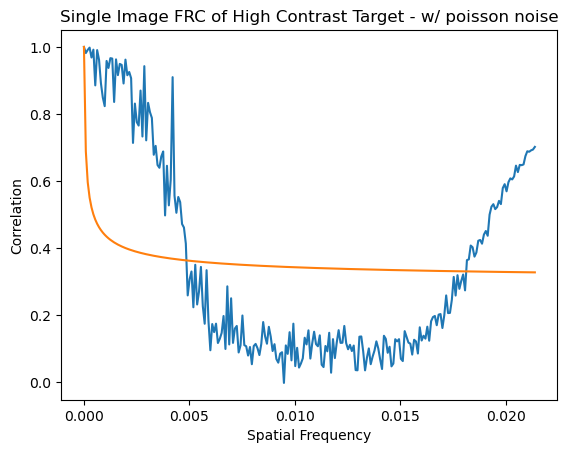

In [44]:
maxFrequency = 1/(2*pixelSize) #Based on the nyquist frequency
print(maxFrequency)
x_fsc, FSC, x_T, T = FRC(n1, n2, thresholding = "half-bit")
p1 = plt.plot(x_fsc*maxFrequency, FSC)
p2 = plt.plot(x_T*maxFrequency, T)
# p1 = plt.plot(x_fsc, FSC)
# p2 = plt.plot(x_T, T)
plt.title("Single Image FRC of High Contrast Target - w/ poisson noise")
plt.xlabel('Spatial Frequency')
plt.ylabel('Correlation')
plt.show(p1,p2)

In [45]:
# Find indices where T - FSC changes sign
diff = T - FSC
indices = np.where(np.diff(np.sign(diff)))[0]  # Points where sign changes


# Linear interpolation for precise intersection points
intersection_points = []
for i in indices:
    x1, x2 = x_fsc[i], x_fsc[i+1]
    y1, y2 = diff[i], diff[i+1]
    # Linear interpolation formula: x = x1 - y1 * (x2 - x1) / (y2 - y1)
    x_intersection = x1 - y1 * (x2 - x1) / (y2 - y1)
    intersection_points.append(x_intersection)

print("Pixel Size: ", pixelSize, "nm")
maxFrequency = 1/(2*pixelSize) #Based on the nyquist frequency
print("Max Frequency: ", maxFrequency, "nm^-1")
intersectionFrequency = intersection_points[1]*maxFrequency
print("Intersection Frequency: ", intersectionFrequency, "nm^-1")
resolution = 1/intersectionFrequency
print("Resolution: ", resolution, "nm")

Pixel Size:  23.291 nm
Max Frequency:  0.021467519642780472 nm^-1
Intersection Frequency:  0.004859227921500513 nm^-1
Resolution:  205.79401010916226 nm


## Import FRC data to make graph

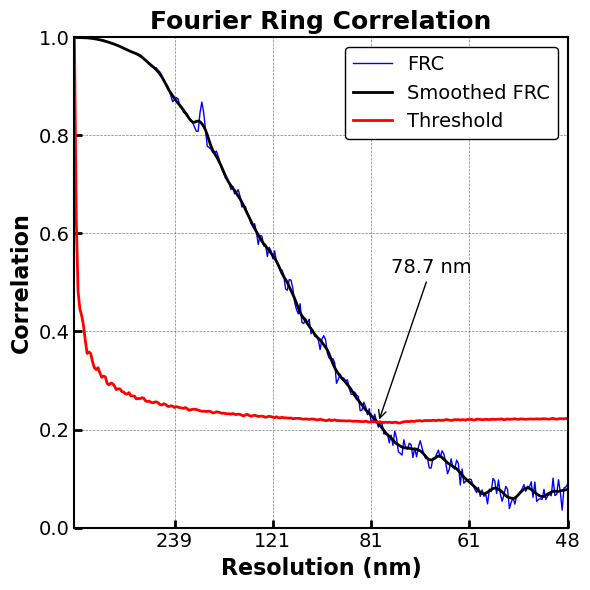

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file, skipping the first row (headers)
file_path = "Run135Info/460FinalObjectFRC.tsv.txt"  # Update with the actual filename
data = np.loadtxt(file_path, skiprows=1)

# Extract columns
x_values = data[:, 0]  # First column: Original x-values
y1 = data[:, 1]  # Second column: FRC (Blue)
y2 = data[:, 2]  # Third column: FRC Smoothed (Black)
y3 = data[:, 3]  # Fourth column: Threshold (Red)

# Scaling factor
scaling_factor = 13136.2

# Create figure and plot with a more square aspect ratio
fig, ax1 = plt.subplots(figsize=(6, 6))  # Square aspect ratio (width = height)

# Plot the curves with adjusted thickness
ax1.plot(x_values, y1, 'b-', label="FRC", linewidth=1)  # Thicker Blue line
ax1.plot(x_values, y2, 'k-', label="Smoothed FRC", linewidth=2)  # Slightly thicker Black line
ax1.plot(x_values, y3, 'r-', label="Threshold", linewidth=2)  # Thicker Red line

# Find resolution threshold crossing
crossing_index = np.where(y2 < y3)[0][0]

# Annotate threshold crossing with simplified position and label
ax1.annotate(f"{scaling_factor/crossing_index:.1f} nm",
             xy=(x_values[crossing_index], y3[crossing_index]),
             xytext=(x_values[crossing_index] + 7, 0.52),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=14)  # Increase annotation font size

# Set labels and title with larger font sizes and bold text
ax1.set_xlabel("Resolution (nm)", fontsize=16, fontweight='bold')  # Larger x-axis label and bold
ax1.set_ylabel("Correlation", fontsize=16, fontweight='bold')  # Larger y-axis label and bold
ax1.set_title("Fourier Ring Correlation", fontsize=18, fontweight='bold')  # Larger title and bold

# Set the limits for y-axis and x-axis
ax1.set_ylim(0, 1)  # Ensures y-axis starts at 0
ax1.set_xlim(0, max(x_values))

# Scale the x-ticks and round them to whole numbers
tick_indices = np.linspace(1, len(x_values) - 1, num=6, dtype=int)  # Fewer ticks

# Set the x-ticks and labels with larger font size and bold
ax1.set_xticks(tick_indices[1:])
ax1.set_xticklabels(np.round(scaling_factor/tick_indices[1:]).astype(int), fontsize=14)

# Set y-ticks with larger font size and bold
ax1.tick_params(axis='y', labelsize=14, width=2, length=6, direction='in', grid_color='black', grid_alpha=0.5)  # Make ticks bold and adjust width
ax1.tick_params(axis='x', labelsize=14, width=2, length=6, direction='in', grid_color='black', grid_alpha=0.5)  # Adjust x-tick marks as well

# Grid, legend, and aesthetics
ax1.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
ax1.legend(fontsize=14, frameon=True, framealpha=1, edgecolor='black', loc='upper right')  # Larger legend text with a frame
plt.tight_layout()  # Adjust layout for better fitting

# Add border outline with slightly thicker lines
for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)  # Make the outline of the graph slightly thicker

# Show plot and save it
plt.savefig("custom_frc_plot.png", bbox_inches='tight')
plt.show()


In [2]:
pwd

'/Users/levihancock/Documents/Work/Code/TomoMono'